<a href="https://colab.research.google.com/github/Foco22/Ship_Prediction_Models/blob/master/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
url = 'https://raw.githubusercontent.com/Jay2201/LinearRegress/master/cruise_ship_info.csv'
df = pd.read_csv(url)
df

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [3]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


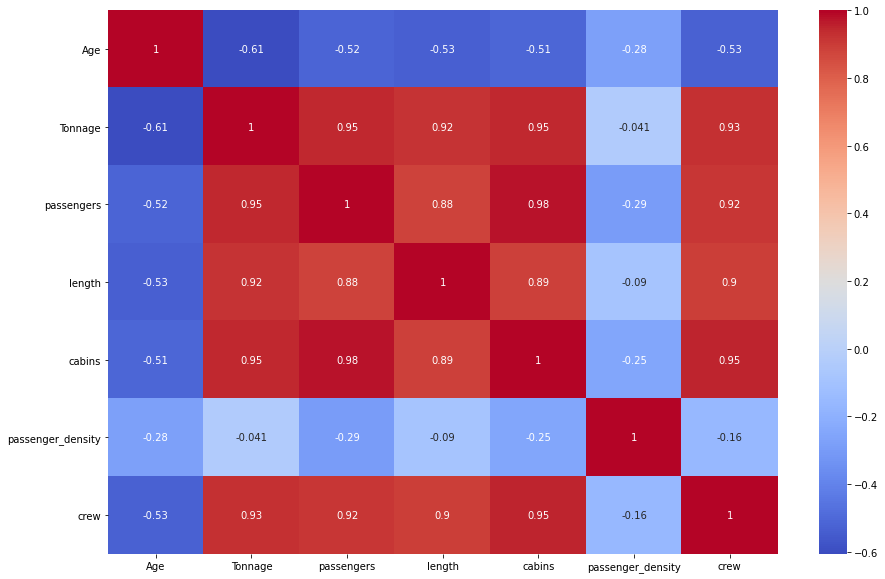

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

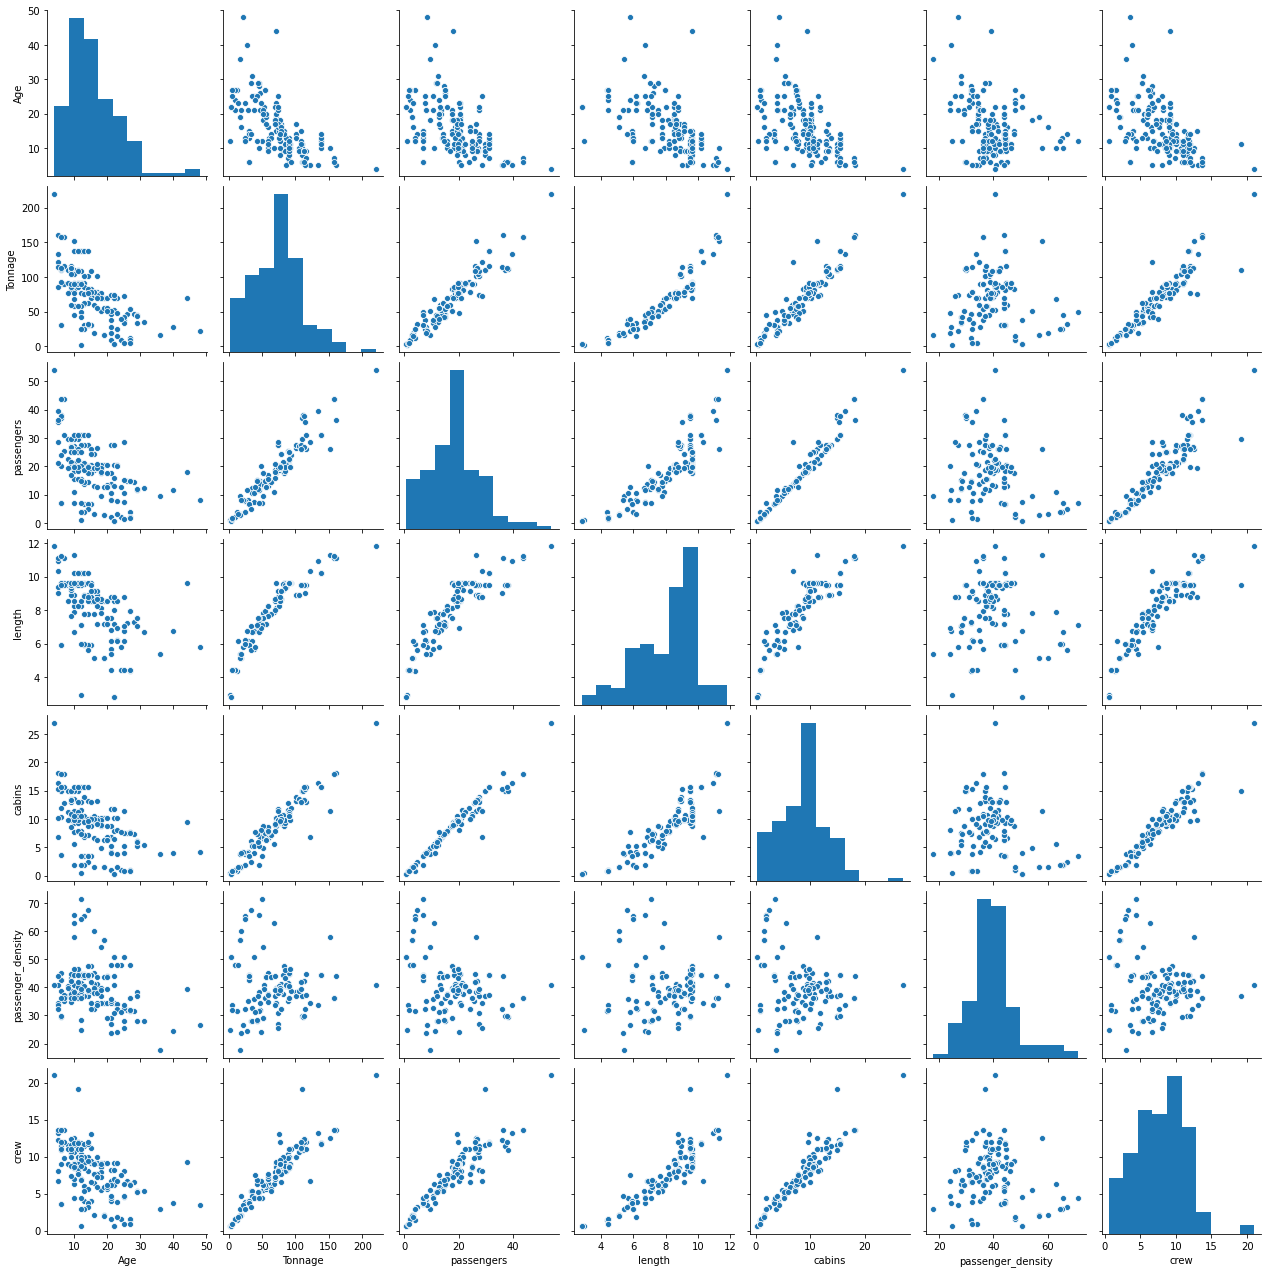

In [7]:
sns.pairplot(df)

In [22]:
df1 = pd.get_dummies(df['Cruise_line'])
result = pd.concat([df1, df], axis=1, sort=False)
result= result.drop('Cruise_line', axis = 1)
result= result.drop('Ship_name', axis = 1)
result= result.drop('Age', axis = 1)
result.head()

,Azamara,Carnival,Celebrity,Costa,Crystal,Cunard,Disney,Holland_American,MSC,Norwegian,Oceania,Orient,P&O,Princess,Regent_Seven_Seas,Royal_Caribbean,Seabourn,Silversea,Star,Windstar,Tonnage,passengers,length,cabins,passenger_density,crew
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.277,6.94,5.94,3.55,42.64,3.55
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.277,6.94,5.94,3.55,42.64,3.55
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47.262,14.86,7.22,7.43,31.80,6.70
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110.000,29.74,9.53,14.88,36.99,19.10
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101.353,26.42,8.92,13.21,38.36,10.00


Modelo de Prediccion

Linear Regression


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = result.iloc[:,:-1]
y = result.iloc[:,-1] 
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state =0, train_size= 0.6)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linreg = LinearRegression().fit(X_train_scaled, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled, y_test)))

linear model coeff (w): [-1.03682445e-01  6.02234693e-01  4.99547846e-01 -2.51385088e-01
 -1.36082891e-01 -6.58843775e-02  5.30731727e-01 -6.73270913e-01
 -1.09143176e-01  2.06171350e-01  4.15846522e-01 -8.88178420e-16
 -4.04717636e-01 -1.97969110e-01  2.87160817e-01 -1.27135059e+00
  2.78863942e-01  5.10783896e-02  8.55467068e-01 -5.13616130e-01
  3.64821174e+00 -2.86875250e+00  4.46375579e+00  9.68433602e+00
 -1.86548291e-01]
linear model intercept (b): 0.116
R-squared score (training): 0.946
R-squared score (test): 0.937


Ridge Regression

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0, train_size= 0.6)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=0.1).fit(X_train_scaled, y_train)

print('Ship DataSet')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Ship DataSet
ridge regression linear model intercept: 0.07361319251926268
ridge regression linear model coeff:
[-0.14244852  0.8016977   0.55417584 -0.08777104 -0.20215403  0.02396183
  0.57042402 -0.59613707 -0.0433874   0.35285699  0.32493366  0.
 -0.24293063 -0.07315029 -0.08102569 -1.23330326  0.06111855 -0.2354225
  0.8396833  -0.59112146  3.68833918  1.0434845   4.22210933  6.03885782
  0.3679462 ]
R-squared score (training): 0.945
R-squared score (test): 0.924
Number of non-zero features: 24


Lasso Regression

In [47]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=0.1, max_iter = 10000).fit(X_train_scaled, y_train)

print('Ship dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

Crime dataset
lasso regression linear model intercept: 1.6890654409587347
lasso regression linear model coeff:
[-0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.         -0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
  0.         -0.          0.30514356  0.          1.95534224  9.9430858
  0.        ]
Non-zero features: 3
R-squared score (training): 0.886
R-squared score (test): 0.943

Features with non-zero weight (sorted by absolute magnitude):


In [46]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9, 1]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.10
Features kept: 3, r-squared training: 0.89, r-squared test: 0.94

Alpha = 0.20
Features kept: 1, r-squared training: 0.84, r-squared test: 0.90

Alpha = 0.30
Features kept: 1, r-squared training: 0.77, r-squared test: 0.83

Alpha = 0.40
Features kept: 1, r-squared training: 0.68, r-squared test: 0.73

Alpha = 0.50
Features kept: 1, r-squared training: 0.56, r-squared test: 0.61

Alpha = 0.60
Features kept: 1, r-squared training: 0.42, r-squared test: 0.45

Alpha = 0.70
Features kept: 1, r-squared training: 0.25, r-squared test: 0.26

Alpha = 0.80
Features kept: 1, r-squared training: 0.05, r-squared test: 0.04

Alpha = 0.90
Features kept: 0, r-squared training: 0.00, r-squared test: -0.02

Alpha = 1.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.02



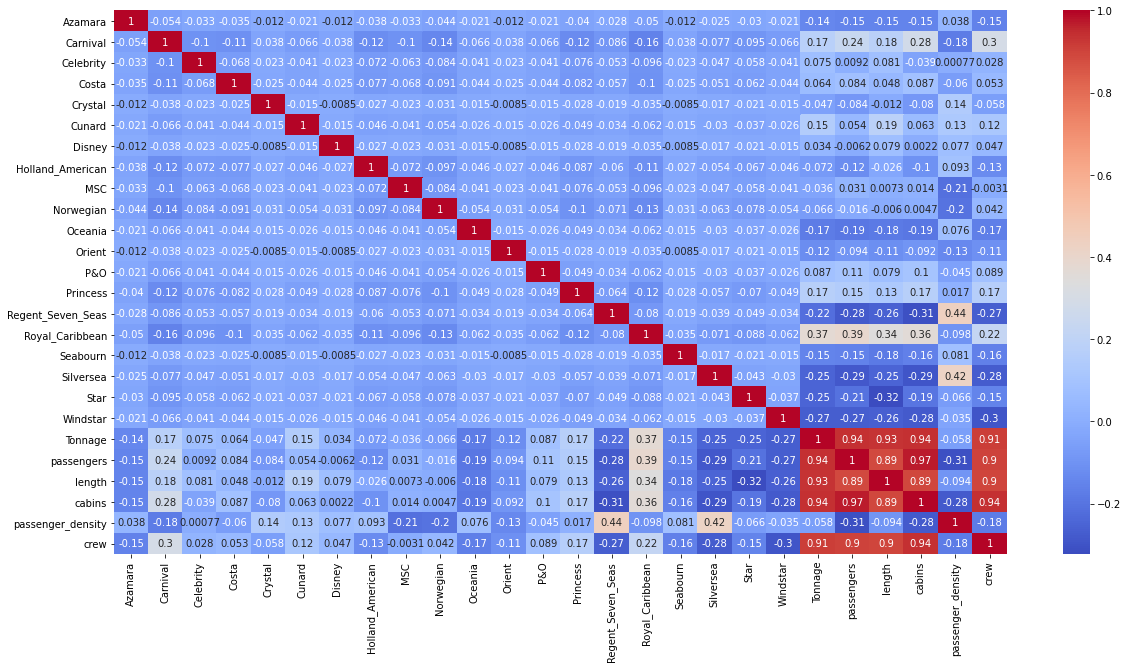

In [55]:
train= pd.concat([X_train, y_train], axis=1, sort=False)

plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)


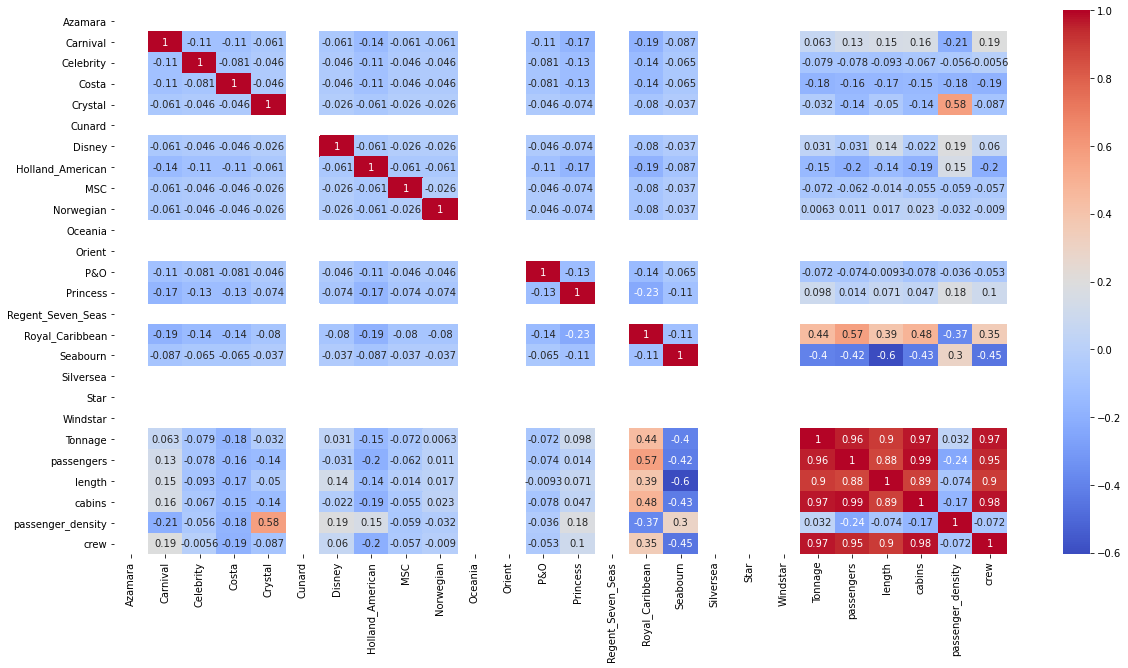

In [57]:
test= pd.concat([X_test, y_test], axis=1, sort=False)

plt.figure(figsize=(20,10))
sns.heatmap(test.corr(),cmap='coolwarm',annot=True)

Cross - Validatation


In [66]:
from sklearn.model_selection import cross_val_score

linlasso = Lasso(alpha=0.1, max_iter = 10000)

cv_scores = cross_val_score(linlasso, X, y, cv = 5)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.65058877 0.93460988 0.87004581 0.95809757 0.94327476]
Mean cross-validation score (5-fold): 0.871
